In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [42]:
#loading the dataset
df = pd.read_csv("C:\\Users\\joshy\\Documents\\college\\sem6\\ML_LAB\\strokedata.csv")
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   gender   age  heart_disease ever_married      work_type Residence_type  \
0    Male  67.0              1          Yes        Private          Urban   
1  Female  61.0              0          Yes  Self-employed          Rural   
2    Male  80.0              1          Yes        Private          Rural   
3  Female  49.0              0          Yes        Private          Urban   
4  Female  79.0              0          Yes  Self-employed          Rural   

   avg_glucose_level   bmi   smoking_status  stroke  
0             228.69  36.6  formerly smoked       1  
1             202.21   NaN     never smoked       1  
2             105.92  32.5     never smoked       1  
3             171.23  34.4           smokes       1  
4             174.12  24.0     never smoked       1  


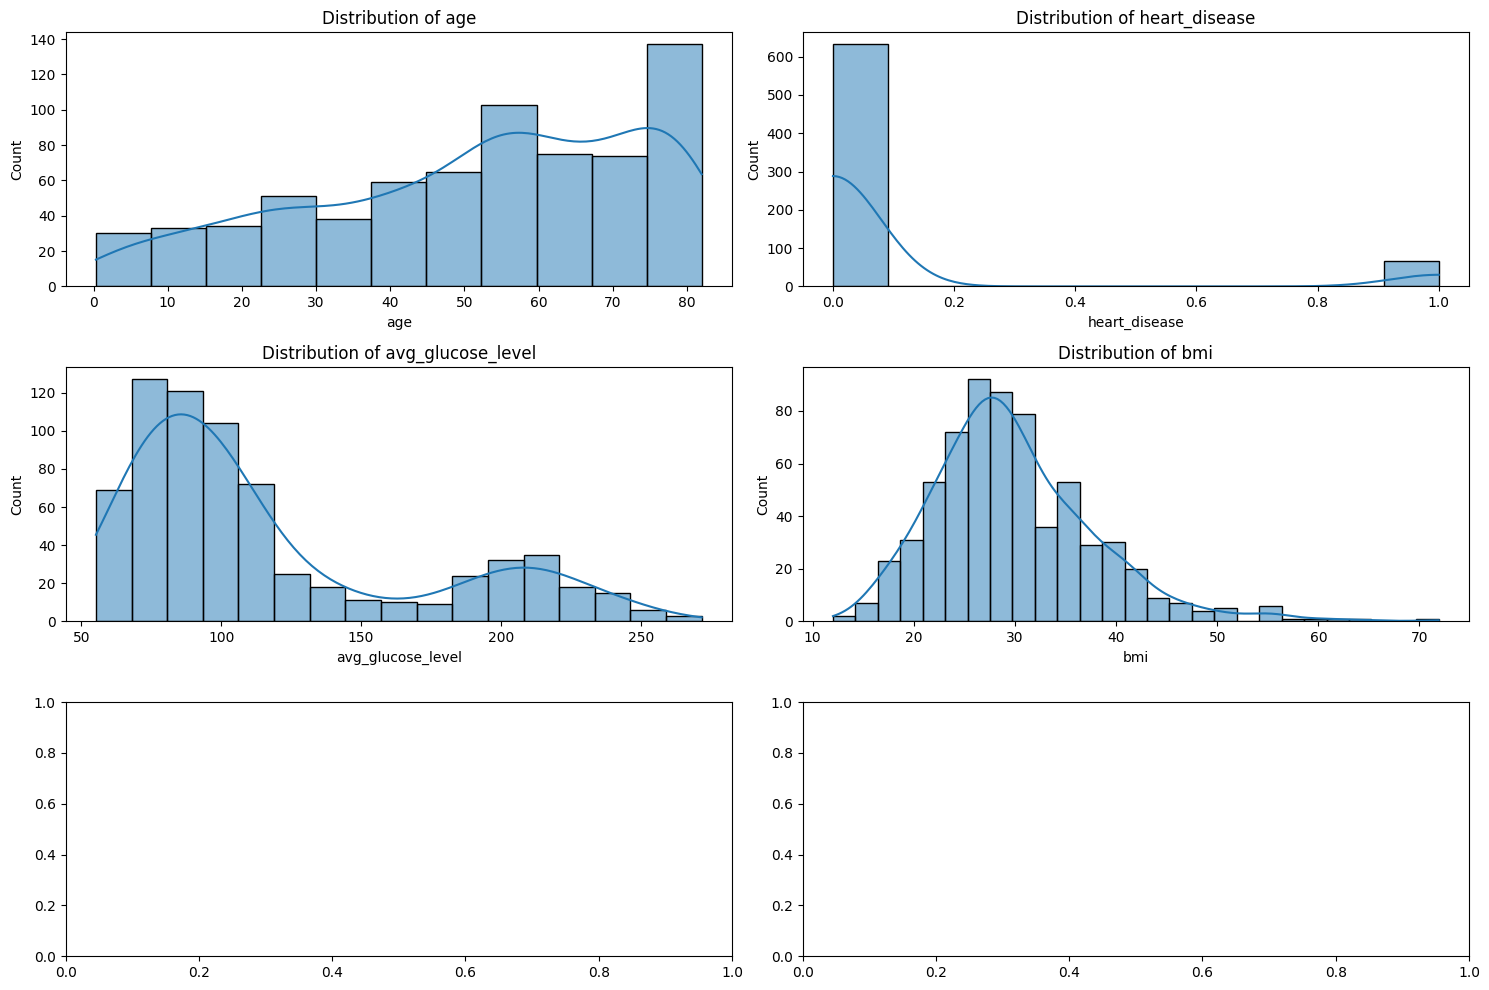

C:\Users\joshy\AppData\Local\Temp\ipykernel_21904\334234655.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='coolwarm' )


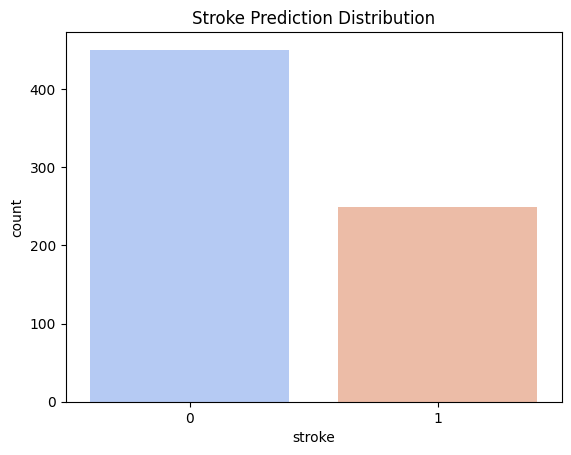

(gender                0
 age                   0
 heart_disease         0
 ever_married          0
 work_type             0
 Residence_type        0
 avg_glucose_level     0
 bmi                  49
 smoking_status        0
 stroke                0
 dtype: int64,
         gender         age  heart_disease ever_married work_type  \
 count      699  699.000000     699.000000          699       699   
 unique       2         NaN            NaN            2         5   
 top     Female         NaN            NaN          Yes   Private   
 freq       413         NaN            NaN          521       410   
 mean       NaN   51.474449       0.095851          NaN       NaN   
 std        NaN   22.416010       0.294598          NaN       NaN   
 min        NaN    0.320000       0.000000          NaN       NaN   
 25%        NaN   36.000000       0.000000          NaN       NaN   
 50%        NaN   55.000000       0.000000          NaN       NaN   
 75%        NaN   71.000000       0.000000   

In [43]:
missing_values = df.isnull().sum()
# Summary statistics
summary_stats = df.describe(include='all')
# Visualize the distribution of numerical features
numerical_features = ['age' , 'heart_disease' , 'avg_glucose_level' ,'bmi' ]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes. flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Visualize the target variable
sns.countplot(x='stroke', data=df, palette='coolwarm' )
plt.title('Stroke Prediction Distribution' )
plt.show()

missing_values, summary_stats

In [44]:
# Check the dependent and independent variables
X = df[['age']]  # Independent variable
y = df['avg_glucose_level']  # Dependent variable

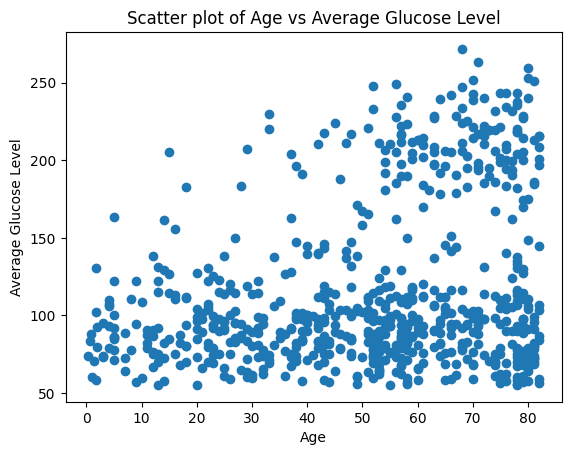

In [45]:
# Visualize the change in the variables
plt.scatter(X, y)
plt.title('Scatter plot of Age vs Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

In [46]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Shape of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (559, 1)
Shape of X_test: (140, 1)
Shape of y_train: (559,)
Shape of y_test: (140,)


In [48]:
# Train the algorithm
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Retrieve the intercept
intercept = model.intercept_
print("Intercept:", intercept)

Intercept: 82.54175334476854


In [50]:
# Retrieve the slope
slope = model.coef_
print("Slope:", slope)

Slope: [0.69134721]


In [51]:
# Predicted value
y_pred = model.predict(X_test)

In [52]:
# Evaluate the algorithm
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2452.6665269642685


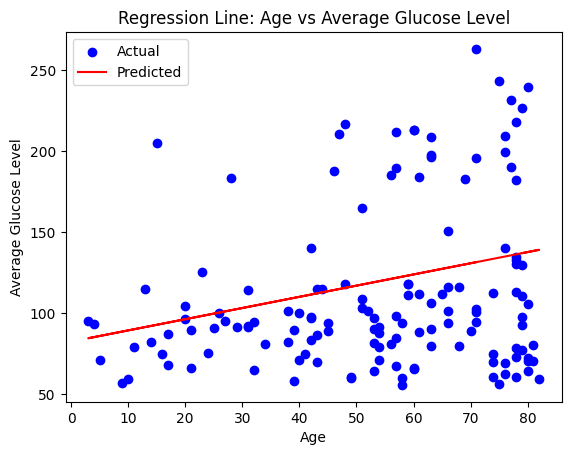

In [53]:
# Visualize the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Regression Line: Age vs Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.legend()
plt.show()
